## Анализ проадж кофейни в Кейптауне.
Данные взяты с Kagle [Coffee Store Sales](https://www.kaggle.com/datasets/reignrichard/coffee-store-sales).

<a id="label_0"></a>
**План исследования**

- [Тенденция продаж по дням недели (понедельник–воскресенье)](#label_1)
- [Распределение выручки по типу кофе](#label_2)
- [Предпочтительный способ оплаты (карта или наличные)](#label_3)
- [Среднее количество продаж в день](#label_4)
- [Анализ пользователей](#label_5)
- [Итоги](#label_6)

**Описание данных**  
В таблице приведены данные продаж в одной кофейне в Кейптауне с 1 марта 2024 по 23 марта 2025.

- `date` - Дата транзакции (ГГГГ/ММ/ДД)
- `datetime` - Точное время транзакции
- `cash_type` - Способ оплаты (карта или наличные)
- `card` - Анонимный идентификатор клиента (программа лояльности на основе карты)
- `money` - Сумма, потраченная за одну транзакцию (в южноафриканских рандах)
- `coffee_name` - Тип купленного кофе

### Загрузка и предобработка данных

In [1]:
# загружаем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
# загружаем данные
df = pd.read_excel('C:/Files/GitHub/Coffee_sales/Coffe_sales.xlsx')
# знакомимся с данными
display(df.head())
df.info()

,date,datetime,hour_of_day,cash_type,card,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort
0,2024-03-01,2024-03-01 10:15:50.520,10,card,ANON-0000-0000-0001,38.7,Latte,Morning,Fri,Mar,5,3
1,2024-03-01,2024-03-01 12:19:22.539,12,card,ANON-0000-0000-0002,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3
2,2024-03-01,2024-03-01 12:20:18.089,12,card,ANON-0000-0000-0002,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3
3,2024-03-01,2024-03-01 13:46:33.006,13,card,ANON-0000-0000-0003,28.9,Americano,Afternoon,Fri,Mar,5,3
4,2024-03-01,2024-03-01 13:48:14.626,13,card,ANON-0000-0000-0004,38.7,Latte,Afternoon,Fri,Mar,5,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3636 non-null   datetime64[ns]
 1   datetime     3636 non-null   datetime64[ns]
 2   hour_of_day  3636 non-null   int64         
 3   cash_type    3636 non-null   object        
 4   card         3547 non-null   object        
 5   money        3636 non-null   float64       
 6   coffee_name  3636 non-null   object        
 7   Time_of_Day  3636 non-null   object        
 8   Weekday      3636 non-null   object        
 9   Month_name   3636 non-null   object        
 10  Weekdaysort  3636 non-null   int64         
 11  Monthsort    3636 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(3), object(6)
memory usage: 341.0+ KB


In [3]:
tmp = df.copy()            # Делаем копию текущего датасета
missing_stats = pd.DataFrame({'Кол-во пропусков': tmp.isnull().sum(),
							'Доля пропусков': tmp.isnull().mean().round(4)})
missing_stats = missing_stats[missing_stats['Кол-во пропусков'] > 0]
missing_stats.style.background_gradient(cmap='coolwarm') if not missing_stats.empty else "Пропусков в данных нет"

,Кол-во пропусков,Доля пропусков
card,89,0.024500


Видим, что в столбце `card` есть 89 пропусков.

In [4]:
# заменим названия столбцов на вид snake
df.columns = df.columns.str.lower()

In [5]:
# проверим на явные дубликаты
df.duplicated().sum()

0

Явных дубликатов тоже нет.

### Анализ данных

<a id="label_1"></a>
#### 1. Продажи по дням недели

In [6]:
# группируем по дням недели
grouped = df.groupby('weekday')
# считаем кол-во продаж
sales_cnt = grouped.size()
# считаем среднюю выручку
avg_revenue = grouped['money'].sum()
# объединяем в итоговый DataFrame
result = pd.DataFrame({
    'sales_count': sales_cnt,
    'revenue': avg_revenue,
    'weekday_number':grouped.weekdaysort.median().astype('int64')}).sort_values('weekday_number')
result

,sales_count,revenue,weekday_number
weekday,,,
Mon,561,17925.10,1
Tue,585,18637.38,2
Wed,510,16093.46,3
Thu,520,16477.40,4
Fri,544,17257.66,5
Sat,482,15182.52,6
Sun,434,13858.06,7


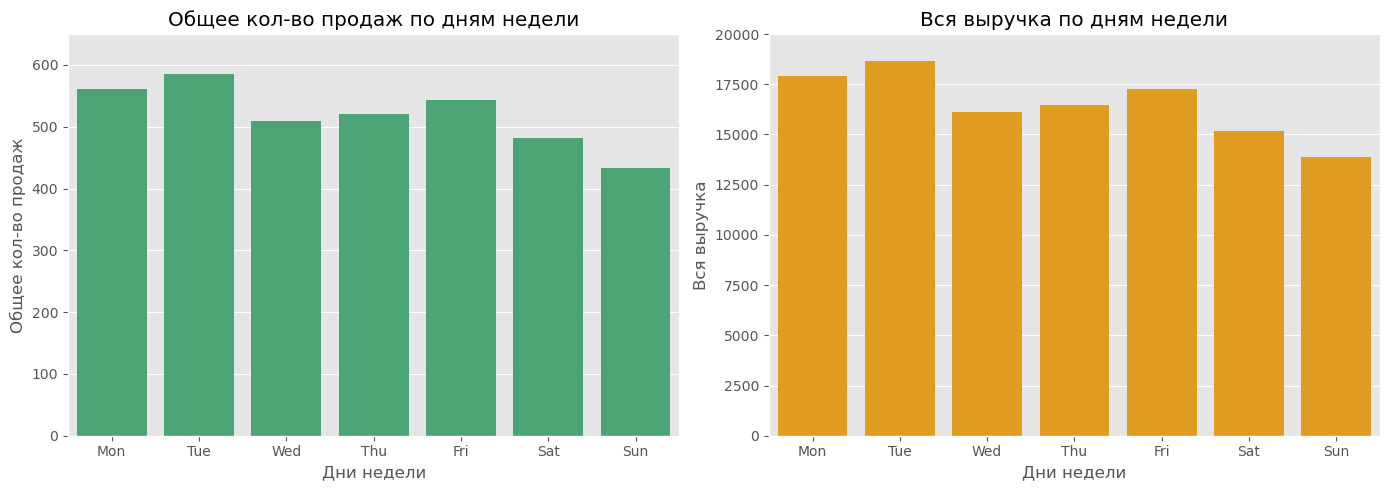

In [7]:
# построим столбчатый график
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,5), sharex=True)

sns.barplot(x=result.index, y='sales_count', data=result, ax=ax1, color='mediumseagreen')
ax1.set_title('Общее кол-во продаж по дням недели')
ax1.set_ylabel('Общее кол-во продаж')
ax1.set_xlabel('Дни недели')
ax1.grid(True, axis='y')
ax1.set_ylim(0, 650)

sns.barplot(x=result.index, y='revenue', data=result, ax=ax2, color='orange')
ax2.set_title('Вся выручка по дням недели')
ax2.set_ylabel('Вся выручка')
ax2.set_xlabel('Дни недели')
ax2.grid(True, axis='y')
ax2.set_ylim(0, 20000)

plt.tight_layout()

plt.show()

Видим, что кол-во продаж и выручка снижаются к концу недели. При этом есть 2 максимума - во вторник и в пятницу. Худший день - воскресенье (самые низкие продажи и выручка). Стоит посмотреть, как ведет себя выручка по дням недели в зависимости от типа кофе.

Посмотрим на типичное (среднее) распределение продаж и выручки по дням недели.

In [8]:
# посчитаем кол-во униальных дней недели за весь период (сколько у нас понедельников, вторников и т.д.)
unique_days = df[['date', 'weekday', 'weekdaysort']].drop_duplicates()
count_days = unique_days[['weekday', 'weekdaysort']].value_counts().reset_index().sort_values(by='weekdaysort')
count_days

,weekday,weekdaysort,count
1,Mon,1,55
3,Tue,2,55
6,Wed,3,52
5,Thu,4,54
0,Fri,5,56
2,Sat,6,55
4,Sun,7,54


Видим, что есть дни, кол-во которых отличается от других больше, чем на 2. Значит в данных есть пропущенные дни, возможно праздники, когда кафе не работало.

Найдем эти дни.

In [9]:
start_date = '2024-03-01'
end_date = '2025-03-23'

# Создаем полный эталонный ряд дат
full_dates = pd.date_range(start=start_date, end=end_date)

# Даты из ваших данных
data_dates = df['date'].unique()

# Находим пропущенные даты
missing_dates = full_dates.difference(data_dates)

if not missing_dates.empty:
    print("Пропущенные даты в данных:")
    print(missing_dates)
else:
    print("Все даты присутствуют в данных.")

Пропущенные даты в данных:
DatetimeIndex(['2024-05-01', '2024-05-04', '2024-05-05', '2024-11-27',
               '2025-01-01', '2025-01-19', '2025-01-23'],
              dtype='datetime64[ns]', freq=None)


Видим, что 7 дней в данных отсутствуют. На наши рассчеты это никак не повлияет, т.к. и транзакций в эти дни не было.

Присоединим кол-во дней недели к таблице с продажами, и разделим общее кол-во транзакций и выручки на кол-во соответствующих дней недели, чтобы получить средние значения по дням недели.

In [10]:
# присоединим эту таблицу к таблице result
df_weekday_revenue = result.merge(count_days, on='weekday').drop('weekdaysort', axis=1)
# добавим столбцы со средними значениями кол-ва продаж и выручки
df_weekday_revenue['avg_sales_count'] = df_weekday_revenue['sales_count'] / df_weekday_revenue['count']
df_weekday_revenue['avg_revenue'] = df_weekday_revenue['revenue'] / df_weekday_revenue['count']
# добавим столбец с долей выручки
df_weekday_revenue['share_avg_revenue'] = df_weekday_revenue['avg_revenue'] / df_weekday_revenue['avg_revenue'].sum()
df_weekday_revenue

,weekday,sales_count,revenue,weekday_number,count,avg_sales_count,avg_revenue,share_avg_revenue
0,Mon,561,17925.10,1,55,10.200000,325.910909,0.153714
1,Tue,585,18637.38,2,55,10.636364,338.861455,0.159822
2,Wed,510,16093.46,3,52,9.807692,309.489615,0.145969
3,Thu,520,16477.40,4,54,9.629630,305.137037,0.143916
4,Fri,544,17257.66,5,56,9.714286,308.172500,0.145347
5,Sat,482,15182.52,6,55,8.763636,276.045818,0.130195
6,Sun,434,13858.06,7,54,8.037037,256.630741,0.121038


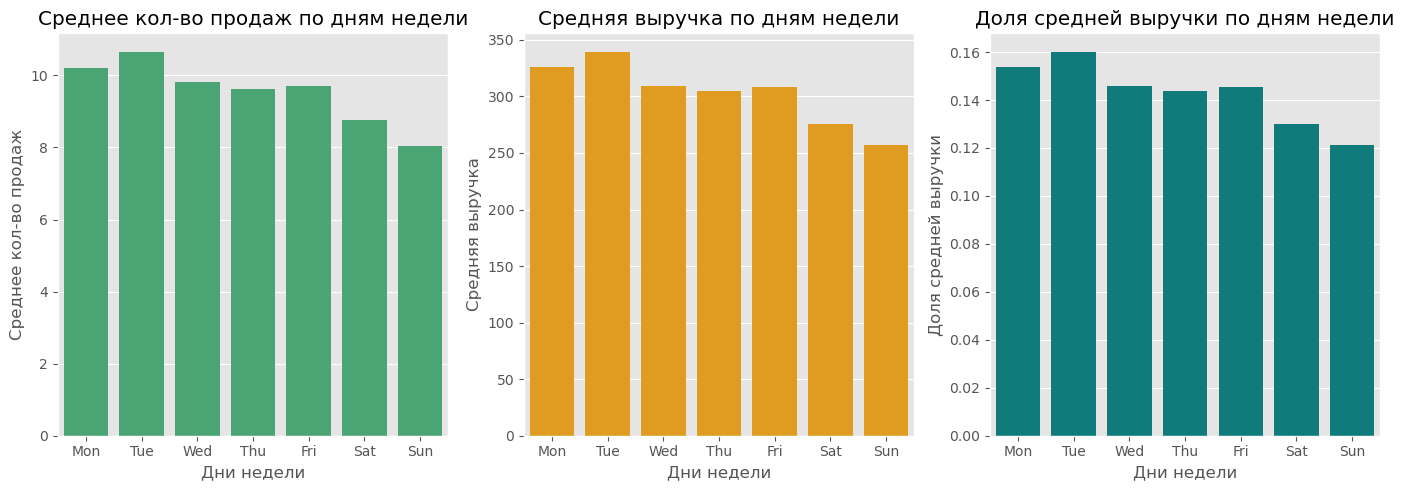

In [11]:
# построим столбчатый график
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(14,5), sharex=True)

sns.barplot(x='weekday', y='avg_sales_count', data=df_weekday_revenue, ax=ax1, color='mediumseagreen')
ax1.set_title('Среднее кол-во продаж по дням недели')
ax1.set_ylabel('Среднее кол-во продаж')
ax1.set_xlabel('Дни недели')
ax1.grid(True, axis='y')

sns.barplot(x='weekday', y='avg_revenue', data=df_weekday_revenue, ax=ax2, color='orange')
ax2.set_title('Средняя выручка по дням недели')
ax2.set_ylabel('Средняя выручка')
ax2.set_xlabel('Дни недели')
ax2.grid(True, axis='y')

sns.barplot(x='weekday', y='share_avg_revenue', data=df_weekday_revenue, ax=ax3, color='darkcyan')
ax3.set_title('Доля средней выручки по дням недели')
ax3.set_ylabel('Доля средней выручки')
ax3.set_xlabel('Дни недели')
ax3.grid(True, axis='y')

plt.tight_layout()

plt.show()

Видим, что типичное (среднее) распределения продаж и выручки по дням недели не отличается от распределения всех продаж и выручки по дням недели. Это говорит о том, что продажи стабильны на протяжении анализируемого периода. Это означает, что нет сильных аномалий или резких колебаний в выручке, и ежедневный спрос относительно равномерен по неделям.

**Промежуточные выводы**

- Суммарная и средняя выручки по дням недели распределены одинаково.
- Есть тренд внутри недели - снижение продажи и выручки к концу недели.
- Похожие распределения суммы и среднего говорят о стабильности по дням недели, что полезно для прогнозирования и планирования.

[в начало](#label_0)

---

<a id="label_2"></a>
### 2. Распределение выручки по типу кофе

In [12]:
# посмотрим названия типов кофе
df['coffee_name'].unique()

array(['Latte', 'Hot Chocolate', 'Americano', 'Americano with Milk',
       'Cocoa', 'Cortado', 'Espresso', 'Cappuccino'], dtype=object)

In [13]:
# приведем названия к виду snake
df['coffee_name'] = df['coffee_name'].str.lower().str.replace(' ', '_')
df['coffee_name'].unique()

array(['latte', 'hot_chocolate', 'americano', 'americano_with_milk',
       'cocoa', 'cortado', 'espresso', 'cappuccino'], dtype=object)

In [14]:
# группируем по названию кофе
df_coffee_group = df.groupby('coffee_name', as_index=False).agg(average_bill=('money', 'mean'), 
                                                                count_sales=('card','count'),
                                                                )
# добавим столбец с выручкой
df_coffee_group['revenue'] = df_coffee_group.average_bill * df_coffee_group.count_sales
# добавим столбец с долей выручки от всей выручки
df_coffee_group['share_revenue'] = df_coffee_group['revenue'] / df_coffee_group['revenue'].sum()
# остортируем по выручке
df_coffee_group = df_coffee_group.sort_values(by='revenue', ascending=False)
df_coffee_group

,coffee_name,average_bill,count_sales,revenue,share_revenue
7,latte,35.634655,757,26975.433632,0.239606
1,americano_with_milk,30.666408,809,24809.123883,0.220364
2,cappuccino,35.996287,486,17494.195689,0.155390
0,americano,26.059273,564,14697.430173,0.130548
6,hot_chocolate,36.072553,276,9956.024681,0.088433
3,cocoa,35.712593,239,8535.309630,0.075814
4,cortado,25.804315,287,7405.838425,0.065781
5,espresso,21.002090,129,2709.269552,0.024065


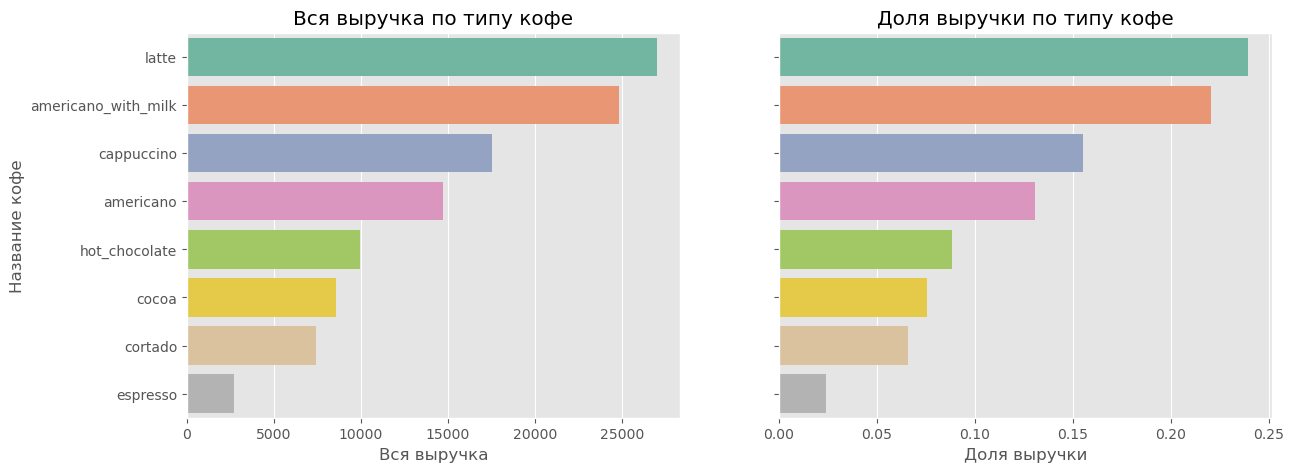

In [15]:
%%capture --no-display 

# построим столбчатую диаграмму
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,5), sharey=True)

sns.barplot(x='revenue', y='coffee_name', data=df_coffee_group, ax=ax1, palette='Set2', orient='h')
ax1.set_ylabel('Название кофе')
ax1.set_title('Вся выручка по типу кофе')
ax1.set_xlabel('Вся выручка')

sns.barplot(x='share_revenue', y='coffee_name', data=df_coffee_group, ax=ax2, palette='Set2', orient='h')
ax2.set_title('Доля выручки по типу кофе')
ax2.set_xlabel('Доля выручки')

plt.show()

Тройка лидеров по выручке:
- латтэ (23,96%)
- американо с молоком (22,03%)
- капучино (15,54%)

Меньше всего выручки у эспрессо (2,41%)

Посмотрим, как распределена выручка по типу кофе по дням недели.

In [16]:
# группируем по типу кофе и по дням недели
df_coffee_day = df.groupby(['weekday', 'coffee_name']).agg(average_bill=('money', 'mean'), 
                                                            count_sales=('card','count'),
                                                            ).reset_index()
# добавим столбцы с выручкой и долей выручки
df_coffee_day['revenue'] = df_coffee_day['average_bill'] * df_coffee_day['count_sales']
df_coffee_day['share_revenue'] = df_coffee_day.groupby('weekday')['revenue'].transform(lambda x: x / x.sum())
# добавим столбец с номером дня недели для сортировки
days_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
df_coffee_day['day_number'] = df_coffee_day['weekday'].map({day: i+1 for i, day in enumerate(days_order)})
# отсортируем таблицу по порядку дней недели по возрастанию и по выручке по убыванию
df_coffee_day = df_coffee_day.sort_values(by=['day_number', 'revenue'], ascending=[True, False])

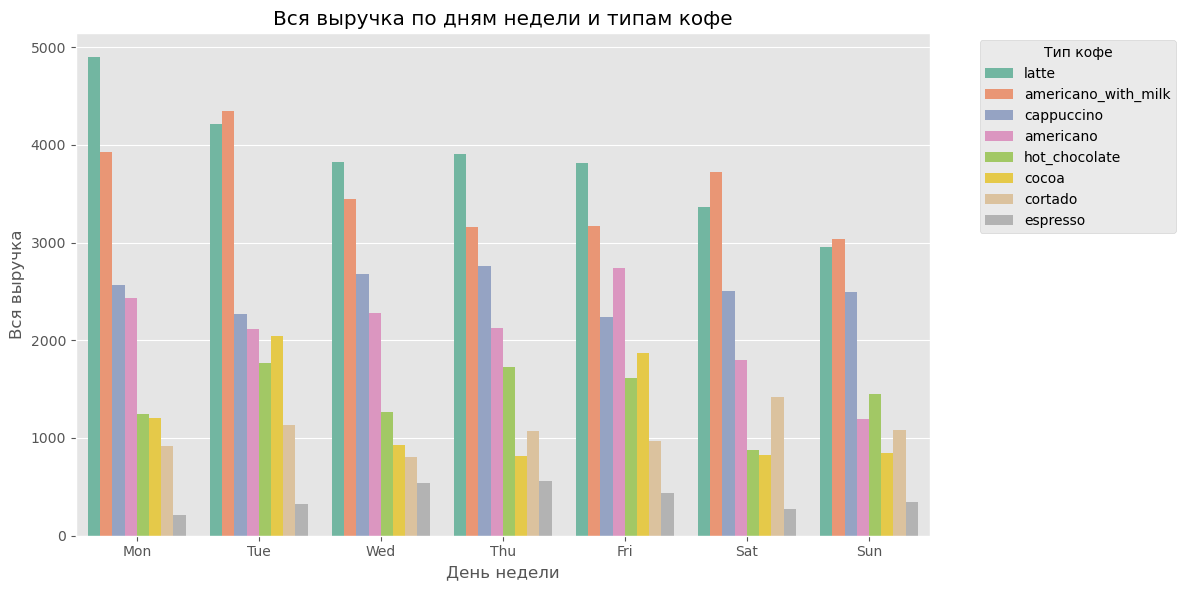

In [17]:
# строим график выручки по дням недели и типу кофе
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_coffee_day, x='weekday', y='revenue', hue='coffee_name', palette='Set2')

plt.title('Вся выручка по дням недели и типам кофе')
plt.ylabel('Вся выручка')
plt.xlabel('День недели')

# размещаем легенду справа за пределами графика, чтобы не перекрывала бары
plt.legend(title='Тип кофе', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

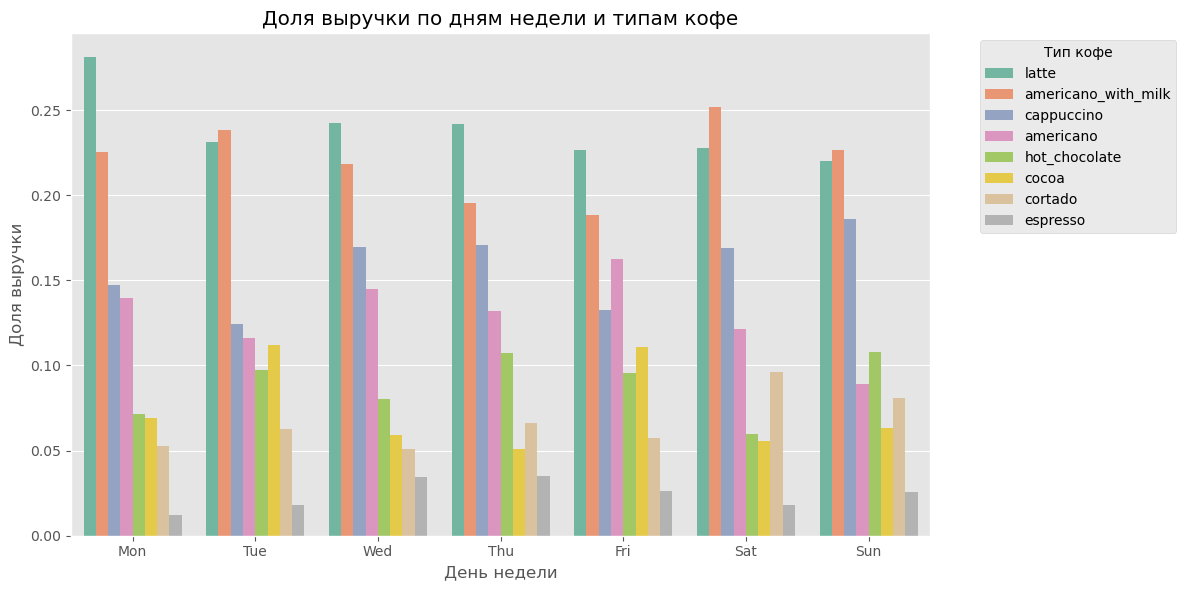

In [18]:
# строим график доли выручки по дням недели и типу кофе
plt.figure(figsize=(12, 6))
sns.barplot(data=df_coffee_day, x='weekday', y='share_revenue', hue='coffee_name', palette='Set2')

plt.title('Доля выручки по дням недели и типам кофе')
plt.ylabel('Доля выручки')
plt.xlabel('День недели')

# размещаем легенду справа за пределами графика, чтобы не перекрывала бары
plt.legend(title='Тип кофе', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Видим, что тройка лидеров осталась прежней, только в пятницу американо подвинуло капично на 4ое место. Во вторник, субботу и воскресенье на первое место вышло американо с молоком, подвинув латтэ на второе место. 

**Промежуточный выводы**

- Есть заметный тренд на снижение продаж и выручки ближе к концу недели. Это может отражать изменения в покупательском трафике или предпочтениях клиентов в будние и выходные дни.

- Тройка лидеров по выручке — латтэ (23,96%), американо с молоком (22,03%), капучино (15,54%) — обеспечивает около 62% всей выручки, что подчеркивает их ключевую роль для бизнеса.

- Самая низкая выручка у эспрессо (2,41%), что указывает на его меньшую популярность среди покупателей.

- Тройка лидеров остается стабильной на протяжении всей недели, демонстрируя устойчивый спрос.

- Понедельник отмечается наибольшими продажами латтэ, что можно использовать для специальных акций или маркетинговых мероприятий.


[в начало](#label_0)

---

<a id="label_3"></a>
### 3. Предпочтительный способ оплаты (карта или наличные)

In [19]:
# посмотрим, какие типы оплат в данных
df['cash_type'].unique()

array(['card', 'cash'], dtype=object)

In [20]:
# сгруппируем по столцу cash_type и посчитаем выручку по типу оплаты
df_cash_type = df.groupby('cash_type').agg(revenue=('money', 'sum')).reset_index()
# добавим столбец доли выручки по типу оплаты
df_cash_type['share_revenue'] = df_cash_type['revenue'] / df_cash_type['revenue'].sum()
df_cash_type

,cash_type,revenue,share_revenue
0,card,112245.58,0.972399
1,cash,3186.00,0.027601


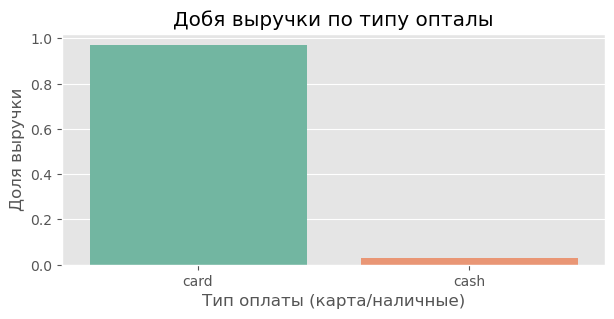

In [21]:
%%capture --no-display
# построим столбчатую диаграмму доли выручки по типу оплаты
plt.figure(figsize=(7,3))

sns.barplot(x='cash_type', y='share_revenue', data=df_cash_type, palette='Set2')
plt.title('Добя выручки по типу опталы')
plt.xlabel('Тип оплаты (карта/наличные)')
plt.ylabel('Доля выручки')

plt.show()

Видим, что основной тип оплаты - карта (97,24%), наличными всего 2,76%.

Посмотрим, какой тип кофе оплачивается наличными.

In [22]:
df_cash_coffee = df[df['cash_type'] == 'cash'].groupby('coffee_name').size().reset_index(name='sale_count').sort_values(
    by='sale_count', ascending=False)
df_cash_coffee

,coffee_name,sale_count
7,latte,25
1,americano_with_milk,15
2,cappuccino,15
0,americano,14
6,hot_chocolate,6
4,cortado,5
5,espresso,5
3,cocoa,4


Видим, что наличными оплачивают все виды кофе, возможно просто не было возможности оплатить картой.

[в начало](#label_0)

---

<a id="label_4"></a>
### 4. Среднее количество продаж в день.

In [23]:
# посмотрим продажи по дням
df_day_sales = df.groupby('date').agg(count_sales=('card', 'count'), day_revenue=('money', 'sum'))


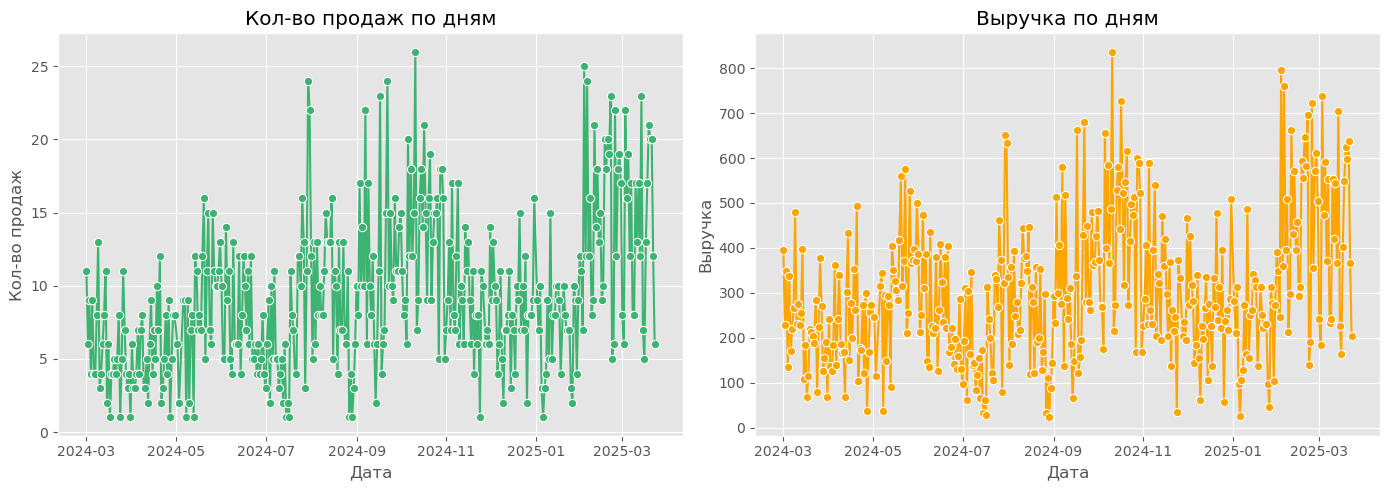

In [24]:
# построим линейный график
# создаем фигуру и оси
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,5), sharex=True)

# первая линия
sns.lineplot(x=df_day_sales.index, y='count_sales', data=df_day_sales, ax=ax1, color='mediumseagreen', marker='o')
ax1.set_title('Кол-во продаж по дням')
ax1.set_ylabel('Кол-во продаж')
ax1.set_xlabel('Дата')
ax1.tick_params(axis='y')
ax1.grid(True)

# вторая линия
sns.lineplot(x=df_day_sales.index, y='day_revenue', data=df_day_sales, ax=ax2, color='orange', marker='o')
ax2.set_title('Выручка по дням')
ax2.set_ylabel('Выручка')
ax2.set_xlabel('Дата')
ax2.tick_params(axis='y')
ax2.grid(True)

plt.tight_layout()
plt.show()

Видим, что продажи и выручка коррелируют, есть сильная волотильность (возможно сезонная, либо акции):
- максимумы - март, апрель, август, октябрь
- минимумы - май, июль, сентябрь, ноябрь, январь

Максимумы 2024 года растут, минимумы не растут, такое поведение можно интерпритировать так:
- **позитивно**: Появляется всё больше и более сильных пиков спроса, что часто свидетельствует об успехах в маркетинге, расширении клиентской базы или увеличении ценности предложения.
- **внимание**: Но при этом базовый, стабильный уровень продаж не растёт, что говорит о том, что постоянная клиентская база или «фоновый» спрос пока не увеличился.

Посмотрим, как ведут себя продажи по месяцам.

In [25]:
# создадим столбец с месяцами
df['month'] = df['date'].dt.strftime('%Y-%m')
# сгруппируем по этому столбцу и посчитаем кол-во продаж и выручку
df_month_sales = df.groupby('month').agg(count_sales=('card', 'count'), month_revenue=('money', 'sum')).reset_index()
df_month_sales

,month,count_sales,month_revenue
0,2024-03,175,7050.20
1,2024-04,168,6720.56
2,2024-05,241,9063.42
3,2024-06,223,7758.76
4,2024-07,237,6915.94
5,2024-08,272,7613.84
6,2024-09,344,9988.64
7,2024-10,426,13891.16
8,2024-11,259,8590.54
9,2024-12,259,8237.74


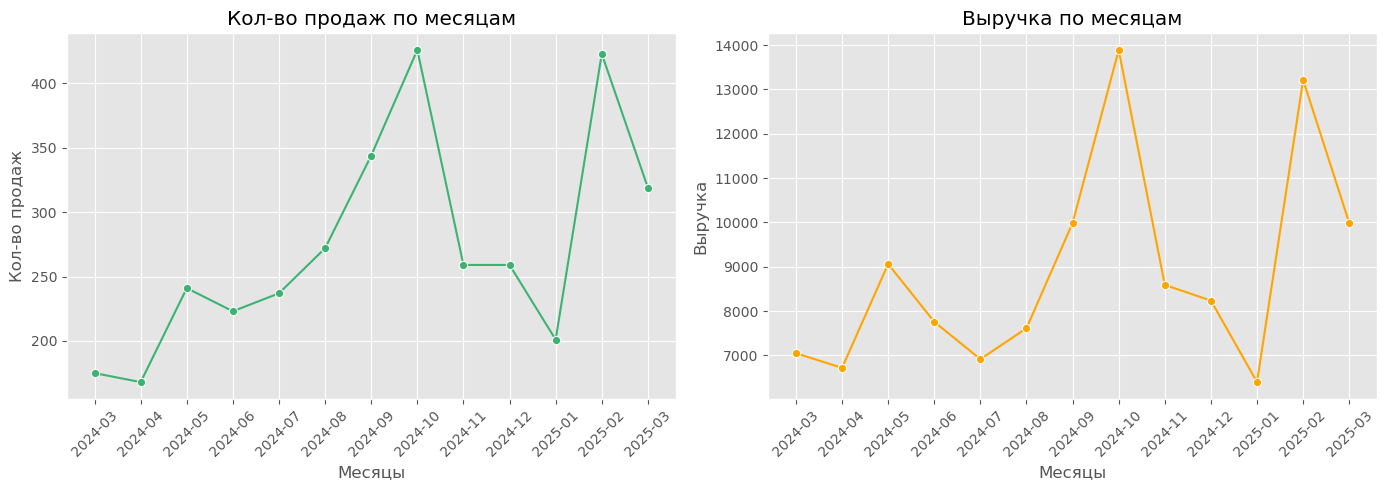

In [26]:
# построим линейный график
# создаем фигуру и оси
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,5), sharex=True)

# первая линия
sns.lineplot(x='month', y='count_sales', data=df_month_sales, ax=ax1, color='mediumseagreen', marker='o')
ax1.set_title('Кол-во продаж по месяцам')
ax1.set_ylabel('Кол-во продаж')
ax1.set_xlabel('Месяцы')
ax1.tick_params(axis='y')
ax1.grid(True)
ax1.tick_params(axis='x', rotation=45)

# вторая линия
sns.lineplot(x='month', y='month_revenue', data=df_month_sales, ax=ax2, color='orange', marker='o')
ax2.set_title('Выручка по месяцам')
ax2.set_ylabel('Выручка')
ax2.set_xlabel('Месяцы')
ax2.tick_params(axis='y')
ax2.grid(True)
ax2.tick_params(axis='x', rotation=45) 

plt.tight_layout()
plt.show()

Видим явную сезонность:
- Пики:
    - в конце зимы (пик в феврале)
    - в конце весны (пик в мае)
    - в середине осени (пик в октябре)
- Спады:
    - в середине весны (минимум в апреле)
    - летом (минимум в июле)
    - зимой (минимум в январе)

На графике выручки есть несколько точек с резкими ушедшими вверх значениями (октябрь, февраль), возможно, в эти месяцы были акции, специальные предложения или продажи дорогих позиций.

Снижение в июле и январе может сигнализировать о том, что в эти периоды кафе стоит задуматься о стимулировании спроса через маркетинг или акции.

[в начало](#label_0)

---

<a id="label_5"></a>
### 5. Анализ пользователей.

Т.к. у нас нет идентификатора пользователя, будем считать идентификатор карты оплаты как пользователя.

Проведем `RFM-анализ` пользователей (`Recency` - кол-во дней с последней покупки, `Frequency` - частота покупок, `Monetary` - выручка).

In [27]:
# считаем, что дата анализа - следующий день после самой поздней транзакции
analysis_date = df['date'].max() + pd.Timedelta(days=1)

rfm = df.groupby('card').agg(
    recency = ('date', lambda x: (analysis_date - x.max()).days), # кол-во дней с последней покупки
    frequency = ('date', 'count'), # частота (кол-во) покупок
    monetary = ('money', 'sum') # общая выручка пользователя
).reset_index().sort_values(by='monetary', ascending=False)

print(f'Всего уникальных пользователей (карт оплаты): {df['card'].nunique()}.')
print(f'Всего дней в анализируемом периоде: {(df['date'].max() - df['date'].min()).days}.')
print('\n Топ-5 пользователей по выручке:')
print()
print(rfm.head())

Всего уникальных пользователей (карт оплаты): 1316.
Всего дней в анализируемом периоде: 387.

 Топ-5 пользователей по выручке:

                     card  recency  frequency  monetary
11    ANON-0000-0000-0012       63        129   3785.92
140   ANON-0000-0000-0141       51        108   2749.78
8     ANON-0000-0000-0009      226         67   2343.98
1162  ANON-0000-0000-1163        3         77   2278.22
275   ANON-0000-0000-0276       53         69   2119.54


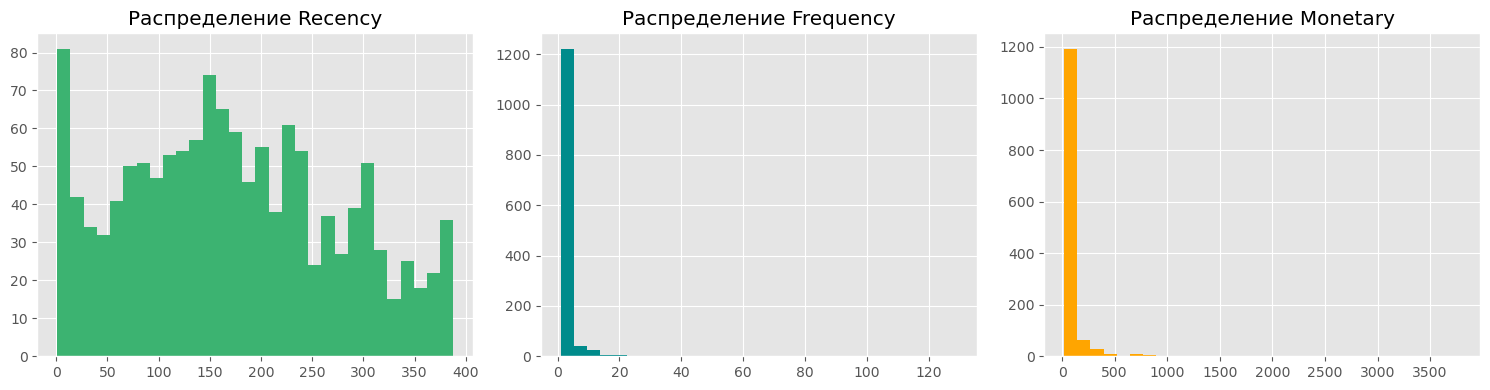

In [28]:
# построим гистограммы для всех показателей rfm-анализа
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].hist(rfm['recency'], bins=30, color='mediumseagreen')
axes[0].set_title('Распределение Recency')

axes[1].hist(rfm['frequency'], bins=30, color='darkcyan')
axes[1].set_title('Распределение Frequency')

axes[2].hist(rfm['monetary'], bins=30, color='orange')
axes[2].set_title('Распределение Monetary')

plt.tight_layout()
plt.show()

*Распределение Recency (кол-во дней с последней покупки)*  
- Значения recency довольно равномерно распределены, с небольшими всплесками в разных диапазонах, что может говорить о наличии как очень активных (недавно покупавших), так и давно неактивных пользователей.
- Высокая плотность около 0-50 дней — много очень свежих клиентов.

*Распределение Frequency (кол-во покупок)*  
- Распределение очень сдвинуто к низким значениям: большинство пользователей совершили очень мало покупок (1-2 раза).
- Есть небольшая часть клиентов с высокой частотой — это потенциально лояльная аудитория.
- Такая концентрация на малых значениях типична для большинства бизнесов, где есть много одноразовых или малособственных покупателей.

*Распределение Monetary (выручка)*  
- Аналогично частоте, большая часть пользователей потратила относительно небольшие суммы.
- Длинный "хвост" вправо означает наличие пользователей с крупными тратами (VIP, постоянные клиенты).
- Такая асимметрия искажения типична для денежной метрики, где чаще всего небольшие покупки преобладают.

**Промежуточные выводы**

- Данные показывают классическую структуру клиентской базы с преобладанием малочастотных и мелких покупателей и меньшим числом активных и крупных клиентов.
- Распределение recency говорит о длительном периоде наблюдения с разной "свежестью" клиентов.
- Для дальнейшего анализа сегментации можно разбивать пользователей на квантили по каждому из показателей, чтобы выделить наиболее ценных.

Построим точечный график для частоты покупок и выручки, цветом обозначем время с последней покупки:

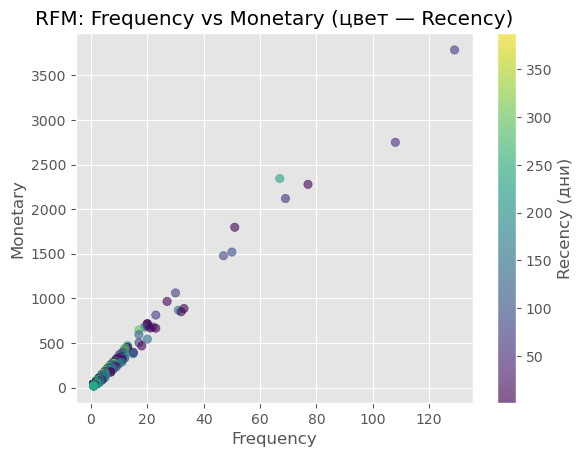

In [29]:
plt.scatter(rfm['frequency'], rfm['monetary'], c=rfm['recency'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Recency (дни)')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('RFM: Frequency vs Monetary (цвет — Recency)')
plt.show()

Основное скопление показателей в нижнем левом углу, т.е. большинство покупателей - малозакупающие клиенты. Видим также 8 клиентов, которые чаще покупают и оставляют большую выручку - это явно постоянные клиенты, судя по цвету точек. Есть среди них один, который давно не покупал, такого хорошо бы вернуть ("реактивировать").

[в начало](#label_0)

---

<a id="label_6"></a>
### Итоговые выводы и рекомендации

**Итоговые выводы**

- Присутствует выраженная сезонность продаж - в феврале, мае, октябре пики продаж, в апреле, июле и январе - минимумы продаж. 

- Продажи по дням недели демонстрируют стабильное распределение с трендом снижения к концу недели, что важно учитывать для планирования и прогнозирования.

- Топ-3 кофе (латтэ, американо с молоком, капучино) обеспечивают основную часть выручки, показывая ключевые направления для продукта.

- Оплата преимущественно картой, что отражает текущие предпочтения покупателей.

- Среднее количество продаж с растущими пиковыми значениями указывает на рост активности точечных событий, но базовый спрос остается стабильным (тренд на рост отсутствует).

- Клиентская база типична: много нерегулярных покупателей и небольшой сегмент постоянных клиентов с высокой выручкой. Есть клиенты, нуждающиеся в "реанимации".

**Рекомендации**

- Исользовать данные о снижениях продаж в несезонье (середина весны, лето, зима) для запуска специальных акций и стимулирующих мероприятий.

- Использовать данные о снижении продаж в конце недели для запуска специальных акций и стимулирующих мероприятий в эти дни.

- Сосредоточиться на развитии и продвижении лидирующих продуктов (латтэ, американо с молоком, капучино).

- Поддерживать и поощрять оплату картой, учитывая её доминирование.

- Работать над расширением стабильной клиентской базы, повышая уровень «фонового» спроса.

- Реализовать программы по возвращению "спящих" клиентов, особенно с высокой прошлой активностью, для увеличения лояльности и выручки.

- Реализовать программы лояльности для перевода "фоновых" покупателей в постоянных.

Эти шаги помогут оптимизировать продажи и улучшить понимание клиентской базы с минимумом усилий.

[в начало](#label_0)